In [ ]:
!pip install layoutparser "layoutparser[layoutmodels]"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 1.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.5/42.5 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.2/48.2 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 5.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.2/19.2 MB 16.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.5/112.5 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 54.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 35.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 43.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
!pip install paddlepaddle paddleocr


  Using cached paddlepaddle-2.6.2-cp311-cp311-manylinux1_x86_64.whl.metadata (8.6 kB)
  Using cached paddleocr-2.9.1-py3-none-any.whl.metadata (8.5 kB)
  Using cached albumentations-1.4.10-py3-none-any.whl.metadata (38 kB)
Using cached paddlepaddle-2.6.2-cp311-cp311-manylinux1_x86_64.whl (126.0 MB)
Using cached paddleocr-2.9.1-py3-none-any.whl (544 kB)
Using cached albumentations-1.4.10-py3-none-any.whl (161 kB)
  Attempting uninstall: albumentations
    Found existing installation: albumentations 1.4.20
    Uninstalling albumentations-1.4.20:
      Successfully uninstalled albumentations-1.4.20


In [ ]:
import layoutparser as lp
import cv2
import numpy as np
import matplotlib.pyplot as plt

 Load the Model

In [ ]:
model = lp.AutoLayoutModel("lp://efficientdet/PubLayNet/tf_efficientdet_d1")

publaynet-tf_efficientdet_d1.pth.tar?dl=1: 80.2MB [00:02, 27.0MB/s]                            
Downloading: "https://github.com/rwightman/efficientdet-pytorch/releases/download/v0.1/tf_efficientdet_d1_40-a30f94af.pth" to /root/.cache/torch/hub/checkpoints/tf_efficientdet_d1_40-a30f94af.pth


 Detect Tables

In [ ]:
def detect_tables(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Detect tables in the image
    layout = model.detect(image)

    # Filter only table detections
    table_blocks = [block for block in layout if block.type == 'Table']

    return image, table_blocks

Crop the Detected Tables

In [ ]:
def crop_tables(image, table_blocks):
    cropped_tables = []
    for i, block in enumerate(table_blocks):
        x1, y1, x2, y2 = map(int, block.coordinates)
        cropped = image[y1:y2, x1:x2]
        cropped_tables.append(cropped)
    return cropped_tables

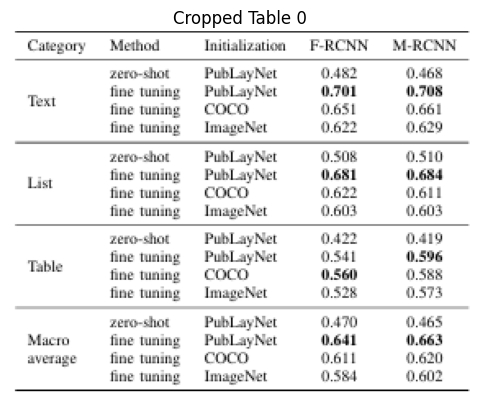

In [ ]:
image_path = "/content/paper.jpg"
image, table_blocks = detect_tables(image_path)
cropped_tables = crop_tables(image, table_blocks)

# Display cropped tables
for i, table in enumerate(cropped_tables):
    plt.figure()
    plt.imshow(table)
    plt.title(f"Cropped Table {i}")
    plt.axis("off")
    plt.show()

In [ ]:
from paddleocr import PaddleOCR, draw_ocr


Load the PaddleOCR model


In [ ]:

ocr_model = PaddleOCR(use_angle_cls=True, lang="en")  # Use PP-OCRv3 with English


download https://paddleocr.bj.bcebos.com/PP-OCRv3/english/en_PP-OCRv3_det_infer.tar to /root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer/en_PP-OCRv3_det_infer.tar


100%|██████████| 3910/3910 [00:17<00:00, 223.94it/s] 


download https://paddleocr.bj.bcebos.com/PP-OCRv4/english/en_PP-OCRv4_rec_infer.tar to /root/.paddleocr/whl/rec/en/en_PP-OCRv4_rec_infer/en_PP-OCRv4_rec_infer.tar


100%|██████████| 10000/10000 [00:17<00:00, 560.61it/s]


download https://paddleocr.bj.bcebos.com/dygraph_v2.0/ch/ch_ppocr_mobile_v2.0_cls_infer.tar to /root/.paddleocr/whl/cls/ch_ppocr_mobile_v2.0_cls_infer/ch_ppocr_mobile_v2.0_cls_infer.tar


100%|██████████| 2138/2138 [00:14<00:00, 146.09it/s]

[2025/03/04 17:56:51] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/root/.paddleocr/whl/rec/en/en_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_length=25, rec_c

In [ ]:
import json
import pandas as pd
from sklearn.cluster import DBSCAN
from prettytable import PrettyTable

# Ensure cropped_tables exists
if 'cropped_tables' not in locals():
    print("Error: No cropped tables found.")
else:
    for i, table in enumerate(cropped_tables):
        table_path = f"cropped_table_{i}.jpg"
        cv2.imwrite(table_path, table)

        # Run OCR
        result = ocr_model.ocr(table_path, cls=True)

        # Extract detected text with bounding box positions
        data = []
        for line in result:
            for word_info in line:
                text, confidence, position = word_info[1][0], word_info[1][1], word_info[0]
                x_min = min([coord[0] for coord in position])  # Left-most X coordinate
                y_min = min([coord[1] for coord in position])  # Top-most Y coordinate
                height = max([coord[1] for coord in position]) - y_min  # Text box height
                data.append((text, confidence, x_min, y_min, height))

        # Sort by Y (rows), then by X (columns)
        data.sort(key=lambda x: (x[3], x[2]))

        # Clustering rows using DBSCAN
        y_coords = np.array([item[3] for item in data]).reshape(-1, 1)
        clustering = DBSCAN(eps=10, min_samples=1).fit(y_coords)
        row_labels = clustering.labels_

        # Organize data into rows
        rows = {}
        for label, item in zip(row_labels, data):
            text, confidence, x_min, y_min, height = item
            if label not in rows:
                rows[label] = []
            rows[label].append((text, x_min))

        # Sort words in each row by X position
        structured_rows = []
        for label in sorted(rows.keys()):
            row = sorted(rows[label], key=lambda x: x[1])  # Sort by X-coordinate
            structured_rows.append([word[0] for word in row])

        # Pad rows to ensure equal column count
        max_columns = max(len(row) for row in structured_rows)
        for row in structured_rows:
            while len(row) < max_columns:
                row.append(None)  # Fill missing values with None

        # Convert to a Pandas DataFrame
        df = pd.DataFrame(structured_rows)

        # Print as PrettyTable
        table = PrettyTable()
        table.field_names = [f"Column {j+1}" for j in range(df.shape[1])]  # Auto-generate column names

        for row in df.values:
            table.add_row(row)

        print("\n" + "=" * 40)
        print(f" **Detected Table {i}:**")
        print("=" * 40)
        print(table)

        # Convert to JSON format
        table_json = df.to_json(orient="records")
        print("\n" + "=" * 40)
        print(" **JSON Output:**")
        print("=" * 40)
        print(table_json)


[2025/03/04 18:16:45] ppocr DEBUG: dt_boxes num : 74, elapsed : 0.1658015251159668
[2025/03/04 18:16:46] ppocr DEBUG: cls num  : 74, elapsed : 0.24856328964233398
[2025/03/04 18:16:48] ppocr DEBUG: rec_res num  : 74, elapsed : 2.29957914352417

 **Detected Table 0:**
+-------------+-------------+----------------+-------------+-------------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+
|   Column 1  |   Column 2  |    Column 3    |   Column 4  |   Column 5  |  Column 6 |  Column 7 |  Column 8 |  Column 9 | Column 10 | Column 11 | Column 12 | Column 13 | Column 14 | Column 15 | Column 16 | Column 17 |
+-------------+-------------+----------------+-------------+-------------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+
|   Category  |    Method   | Initialization |    F-RCNN   |    M-RCNN   | 